In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
dataset_ = pd.read_csv('/content/drive/Shareddrives/Đồ án đa ngành/Flood_Forecast/sample_data.csv')

In [4]:
dataset_.head()

,timestamp,rainfall,tide,flooded
0,2010-01-06 00:00:00,0.066667,-0.370,49808.19372
1,2010-01-06 01:00:00,0.100000,-1.340,50388.62414
2,2010-01-06 02:00:00,0.000000,-1.825,50938.57857
3,2010-01-06 03:00:00,0.033333,-1.902,51456.76400
4,2010-01-06 04:00:00,0.000000,-1.498,51945.07580


In [5]:
dataset_ = dataset_[['rainfall','tide','flooded']]

In [6]:
dataset_.head()

,rainfall,tide,flooded
0,0.066667,-0.370,49808.19372
1,0.100000,-1.340,50388.62414
2,0.000000,-1.825,50938.57857
3,0.033333,-1.902,51456.76400
4,0.000000,-1.498,51945.07580


In [7]:
dataset = dataset_.values
dataset

array([[ 6.66666670e-02, -3.70000000e-01,  4.98081937e+04],
       [ 1.00000000e-01, -1.34000000e+00,  5.03886241e+04],
       [ 0.00000000e+00, -1.82500000e+00,  5.09385786e+04],
       ...,
       [ 0.00000000e+00, -1.50000000e-01,  6.15628569e+06],
       [ 0.00000000e+00, -1.09700000e+00,  6.13308027e+06],
       [ 0.00000000e+00, -2.11800000e+00,  6.10881730e+06]])

In [8]:
# Split data into train and test set
train_dataset, test_dataset = train_test_split(dataset, test_size=0.33, shuffle=False)
print('Train size: ', train_dataset.shape[0])
print('Test size: ', test_dataset.shape[0])

Train size:  16072
Test size:  7917


In [9]:
train_dataset.shape

(16072, 3)

In [10]:
# Scaling Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)

In [11]:
train_dataset[0:11]

array([[7.64119605e-03, 4.53970827e-01, 0.00000000e+00],
       [1.14617940e-02, 2.96758509e-01, 2.31249483e-05],
       [0.00000000e+00, 2.18152350e-01, 4.50357017e-05],
       [3.82059797e-03, 2.05672609e-01, 6.56807452e-05],
       [0.00000000e+00, 2.71150729e-01, 8.51355924e-05],
       [0.00000000e+00, 3.80551053e-01, 1.03477890e-04],
       [0.00000000e+00, 4.85575365e-01, 1.20793504e-04],
       [0.00000000e+00, 5.84116694e-01, 1.37191792e-04],
       [0.00000000e+00, 7.00810373e-01, 1.55100549e-04],
       [0.00000000e+00, 7.48784441e-01, 2.30492430e-04],
       [0.00000000e+00, 6.94651540e-01, 4.03719395e-04]])

In [12]:
def prepare_data(dataset, step_size=10): 
  data_X, data_Y = [], []
  for i in range(len(dataset)-step_size-1):
	  a = dataset[i:(i+step_size), :]
	  data_X.append(a)
	  data_Y.append(dataset[i + step_size, :])
  return np.array(data_X, dtype=np.float32), np.array(data_Y, dtype=np.float32)

step_size = 10
X_train, Y_train = prepare_data(train_dataset, step_size)
X_test, Y_test = prepare_data(test_dataset, step_size)

In [13]:
print(X_train.shape)
print(Y_train.shape)

(16061, 10, 3)
(16061, 3)


In [14]:
n_features = 3
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], n_features)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# model.add(LSTM(units = 80))
# model.add(Dropout(0.3))

model.add(Dense(units = 3))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 2)

Epoch 1/100
251/251 - 17s - loss: 0.0151 - 17s/epoch - 68ms/step
Epoch 2/100
251/251 - 4s - loss: 0.0051 - 4s/epoch - 16ms/step
Epoch 3/100
251/251 - 4s - loss: 0.0044 - 4s/epoch - 15ms/step
Epoch 4/100
251/251 - 4s - loss: 0.0038 - 4s/epoch - 15ms/step
Epoch 5/100
251/251 - 3s - loss: 0.0032 - 3s/epoch - 14ms/step
Epoch 6/100
251/251 - 3s - loss: 0.0028 - 3s/epoch - 14ms/step
Epoch 7/100
251/251 - 3s - loss: 0.0026 - 3s/epoch - 14ms/step
Epoch 8/100
251/251 - 3s - loss: 0.0024 - 3s/epoch - 14ms/step
Epoch 9/100
251/251 - 3s - loss: 0.0022 - 3s/epoch - 14ms/step
Epoch 10/100
251/251 - 3s - loss: 0.0021 - 3s/epoch - 14ms/step
Epoch 11/100
251/251 - 3s - loss: 0.0021 - 3s/epoch - 14ms/step
Epoch 12/100
251/251 - 3s - loss: 0.0020 - 3s/epoch - 14ms/step
Epoch 13/100
251/251 - 3s - loss: 0.0019 - 3s/epoch - 14ms/step
Epoch 14/100
251/251 - 3s - loss: 0.0019 - 3s/epoch - 14ms/step
Epoch 15/100
251/251 - 3s - loss: 0.0018 - 3s/epoch - 14ms/step
Epoch 16/100
251/251 - 3s - loss: 0.0018 - 3s/e

In [15]:
model.save('/content/drive/Shareddrives/Đồ án đa ngành/Flood_Forecast/model.h5')

In [16]:
model = load_model('/content/drive/Shareddrives/Đồ án đa ngành/Flood_Forecast/model.h5')

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
import math

In [18]:
# PREDICTION
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(Y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(Y_test)

In [19]:
# TRAINING EVALUATE

# RMSE: to measure the deviation between the observed value and the true value
train_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
# NSE: Nash efficiency coefficient
train_NSE = 1-(np.sum((trainPredict-trainY)**2)/np.sum((trainY-np.mean(trainY))**2))
# R2
train_R2 = sm.r2_score(trainY, trainPredict)
print('Train RMSE: %.6f' % (train_RMSE))
print('Train NSE: %.6f' % (train_NSE))
print('Train R2: %.6f' % (train_R2))

print('\n')

# TEST EVALUATE
test_RMSE = math.sqrt(mean_squared_error(testY, testPredict))
# NSE: Nash efficiency coefficient
test_NSE = 1-(np.sum((testPredict-testY)**2)/np.sum((testY-np.mean(testY))**2))
# R2
test_R2 = sm.r2_score(testY, testPredict)
print('Test RMSE: %.6f' % (test_RMSE))
print('Test NSE: %.6f' % (test_NSE))
print('Test R2: %.6f' % (test_R2))


Train RMSE: 128224.878460
Train NSE: 0.999237
Train R2: 0.770427


Test RMSE: 101489.249874
Test NSE: 0.999418
Test R2: 0.767094


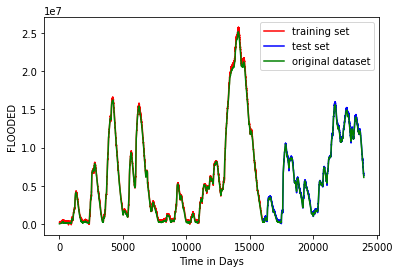

In [20]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(dataset[:,-1].reshape(dataset.shape[0], 1))
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict[:,-1].reshape(trainPredict.shape[0],1)

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(dataset[:,-1].reshape(dataset.shape[0], 1))
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(dataset)-1, :] = testPredict[:,-1].reshape(testPredict.shape[0],1)

# DE-NORMALIZING MAIN DATASET 
datascaled = scaler.inverse_transform(scaler.transform(dataset))
datascaled = datascaled[:,-1].reshape(datascaled.shape[0], 1)
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'test set')
plt.plot(datascaled, 'g', label = 'original dataset')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('FLOODED')
plt.show()